<a href="https://colab.research.google.com/github/sreenidhi2545/Car-Task3/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving car data.csv to car data (1).csv
Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


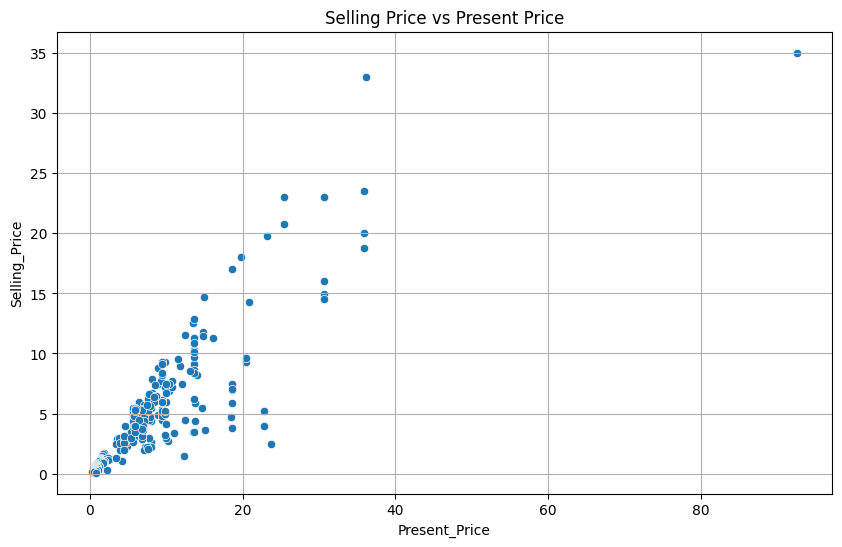

R² Score: 0.85

Prediction Comparison:
     Actual  Predicted
177    0.35   2.954337
289   10.11   8.177163
228    4.95   6.456123
198    0.15  -1.423372
60     6.95   9.088647

Model Coefficients:
                         Coefficient
Year                        0.352925
Present_Price               0.429070
Driven_kms                 -0.000006
Owner                      -0.905018
Fuel_Type_Diesel            2.534904
Fuel_Type_Petrol            0.739155
Selling_type_Individual    -1.191642
Transmission_Manual        -1.640074


In [8]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import files

# Upload file
uploaded = files.upload()

# Read the uploaded CSV file using io.BytesIO
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Dataset preview
print("Dataset Preview:")
print(df.head())

# Strip column names of any leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

# Define features (X) and target variable (y)
X = df[['Year', 'Present_Price', 'Driven_kms', 'Owner',
        'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
        'Selling_type_Individual', 'Transmission_Manual']]
y = df['Selling_Price']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs Present Price')
plt.grid(True)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

# Display a comparison of actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPrediction Comparison:")
print(comparison.head())

# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)
